# Clustering using unsupervised machine learning

The objective of the analysis is to perform cluster analysis on our customers who have churned based on their attributes. Clustering can help we group similar customers together based on certain features or attributes, which can be useful for further analysis or targeted marketing strategies.

In [96]:
# Ignoring warnings 
import warnings
warnings.filterwarnings('ignore')

In [97]:
# Libraries for data manipulation
import numpy as np
import pandas as pd

# Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Libraries for Machine Learning
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import silhouette_score

# Libraries for hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Serialization library
import pickle

Preprocessing, Feature engineering

In [98]:
# Import dataset
df = pd.read_csv('prediction_churn.csv')
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,pred_Churn
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160,1
1,50002,1,9.0,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121,1
2,50003,1,9.0,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120,1
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134,1
4,50005,1,0.0,Phone,1,12.0,CC,Male,3.0,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5612,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151,0
5613,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,3.0,225,0
5614,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186,0
5615,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179,0


In [99]:
# Filter out churned customers
df_churn1 = df[df['pred_Churn'] == 1]
df_churn1.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,pred_Churn
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160,1
1,50002,1,9.0,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121,1
2,50003,1,9.0,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120,1
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134,1
4,50005,1,0.0,Phone,1,12.0,CC,Male,3.0,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130,1


In [100]:
# Check missing values
df_churn1.isnull().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
pred_Churn                     0
dtype: int64

In [101]:
df_churn1= pd.get_dummies(df_churn1, columns=['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus'])
df_churn1 = df_churn1 * 1

In [102]:
# Set option to display all the columns
pd.set_option('display.max_columns', None)
df_churn1.drop(columns=['CustomerID', 'Churn', 'pred_Churn'], inplace=True)
print(df_churn1.shape)
df_churn1.head()

(944, 36)


,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,PreferredLoginDevice_Computer,PreferredLoginDevice_Mobile Phone,PreferredLoginDevice_Phone,CityTier_1,CityTier_2,CityTier_3,PreferredPaymentMode_CC,PreferredPaymentMode_COD,PreferredPaymentMode_Cash on Delivery,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Female,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,4.0,6.0,3.0,3,2,9,1,11.0,1.0,1.0,5.0,160,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
1,9.0,8.0,3.0,4,3,7,1,15.0,0.0,1.0,0.0,121,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1
2,9.0,30.0,2.0,4,3,6,1,14.0,0.0,1.0,3.0,120,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1
3,0.0,15.0,2.0,4,5,8,0,23.0,0.0,1.0,3.0,134,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1
4,0.0,12.0,3.0,3,5,3,0,11.0,1.0,1.0,3.0,130,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1


We will be identifying clusters among customers who have churned, so understanding the feature importances associated with churn is crucial for conducting behavioral clustering and gaining insights into why customers churn. 

Top 17 Feature Importances: 'Tenure', 'Complain', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Fashion', 'NumberOfAddress', 'MaritalStatus_Divorced', 'CityTier_3', 'PreferredPaymentMode_Cash on Delivery', 'MaritalStatus_Married', 'MaritalStatus_Single', 'DaySinceLastOrder', 'CouponUsed', 'SatisfactionScore', 'OrderCount', 'PreferredPaymentMode_Credit Card'.

In [103]:
# Top 17 Feature Importances
top_17_feature_importances = ['Tenure', 'Complain', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 
                              'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Fashion', 'NumberOfAddress', 
                              'MaritalStatus_Divorced', 'CityTier_3', 'PreferredPaymentMode_Cash on Delivery', 'MaritalStatus_Married', 
                              'MaritalStatus_Single', 'DaySinceLastOrder', 'CouponUsed', 'SatisfactionScore', 'OrderCount', 
                              'PreferredPaymentMode_Credit Card']
df_churn = df_churn1[top_17_feature_importances]

Due to the large number of features, directly applying K-Means (or Hierarchical) clustering may not yield optimal results. Find ontain a list of feature pairs that have a correlation coefficient higher than 0.5. These features are candidates for removal from the dataset before running algorithms like K-Means clustering because having features that are highly correlated can distort the distance calculations that K-Means relies on. It's common to consider removing one feature from each pair to reduce redundancy.

In [104]:
correlation_matrix = df_churn.corr().abs()

# Identify highly correlated features (above a threshold, e.g., 0.5)
threshold = 0.5
high_correlation = np.where(correlation_matrix > threshold)
high_correlation_pairs = [(correlation_matrix.index[x], correlation_matrix.columns[y]) 
                          for x, y in zip(*high_correlation) if x != y and x < y]

features_to_drop = set()
for (feature1, feature2) in high_correlation_pairs:
    features_to_drop.add(feature2)  # Arbitrarily choosing the second feature of each pair

# Remove the redundant features from the DataFrame
df_reduced = df_churn.drop(columns=list(features_to_drop))

In [105]:
df_reduced.shape

(944, 15)

In [106]:
df_reduced.columns

Index(['Tenure', 'Complain', 'HourSpendOnApp', 'NumberOfDeviceRegistered',
       'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Fashion',
       'NumberOfAddress', 'MaritalStatus_Divorced', 'CityTier_3',
       'PreferredPaymentMode_Cash on Delivery', 'MaritalStatus_Married',
       'DaySinceLastOrder', 'CouponUsed', 'SatisfactionScore',
       'PreferredPaymentMode_Credit Card'],
      dtype='object')

# KMeans & Hierarchical Clustering 

To determine the most suitable clustering configuration, we will experiment with two different scaling techniques: StandardScaler and MinMaxScaler. These scaling methods will be applied to the data to standardize the feature space before clustering. After scaling, we will employ clustering algorithms such as K-Means and evaluate the results using the Silhouette Score. The scaling method that yields the highest Silhouette Score will be considered the best for our clustering task, as it indicates a more distinct and well-defined cluster formation.

### StandardScaler

KMeans clustering

In [107]:
# Make a copy of dataset
df_standard = df_reduced.copy()

In [108]:
# List of numerical columns to scale
numerical_cols = [
    'Tenure', 'HourSpendOnApp', 'NumberOfDeviceRegistered',
    'SatisfactionScore', 'NumberOfAddress',
    'CouponUsed', 'DaySinceLastOrder']

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply scaling to the numerical columns
df_standard[numerical_cols] = scaler.fit_transform(df_standard[numerical_cols])
df_standard.shape

(944, 15)

Perform Principal Component Analysis (PCA) to uncover the underlying structure of the wholesale customer data. PCA identifies the dimensions that maximize variance, enabling us to discover the combinations of features that most effectively characterize the customers.

Plot the explained variance ratio

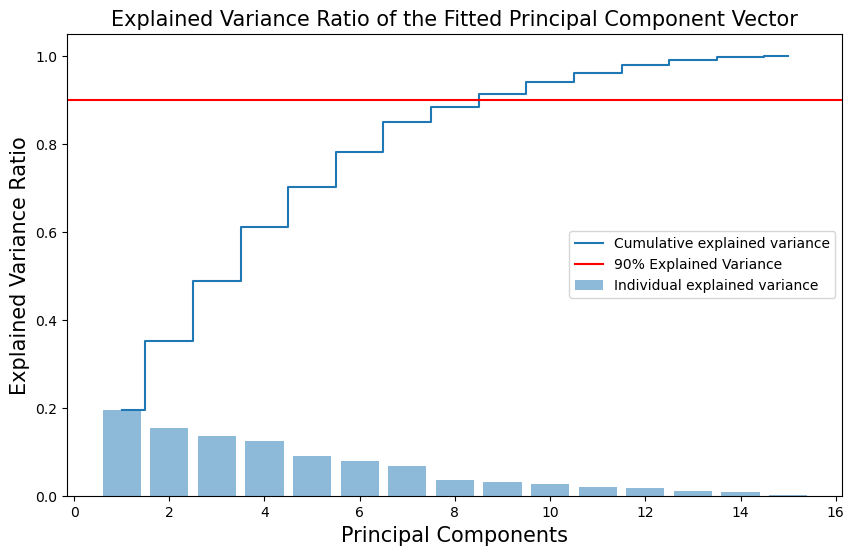

In [109]:
# Fit PCA with all components
pca = PCA(n_components=None)
pca_transformed = pca.fit_transform(df_standard)

# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the explained variance ratio
plt.figure(figsize=(10,6))
plt.bar(range(1, len(cumulative_variance) + 1), pca.explained_variance_ratio_, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative explained variance')
plt.axhline(y=0.90, color='r', linestyle='-', label='90% Explained Variance')

plt.title("Explained Variance Ratio of the Fitted Principal Component Vector", fontsize=15)
plt.xlabel("Principal Components", fontsize=15)
plt.ylabel("Explained Variance Ratio", fontsize=15)
plt.legend(loc='best')
plt.show()

KMeans Clustering

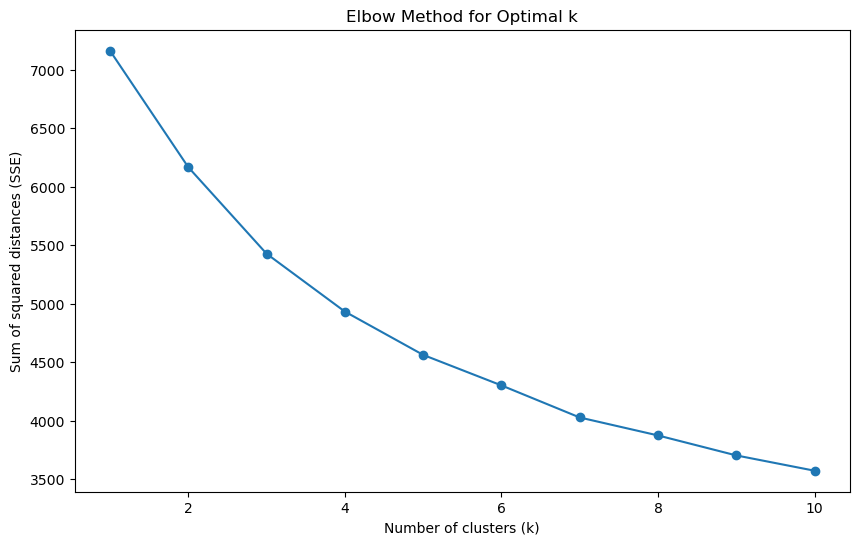

In [110]:
# Fit PCA on the dataset and transform it
pca = PCA(n_components=9) 
pca_transformed = pca.fit_transform(df_standard)

# Compute the sum of squared distances (SSE) for different numbers of clusters (k)
sse = []
list_k = range(1, 11) 

for k in list_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_transformed)  # Use the PCA-reduced data here
    sse.append(kmeans.inertia_)

# Plot the SSE for each k to find the elbow
plt.figure(figsize=(10, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances (SSE)')
plt.title('Elbow Method for Optimal k')
plt.show()

Elbow isn't clear or the curve is quite gradual

Find the best optimal k with the highest silhouette_score

In [111]:
range_n_clusters = list(range(2, 11))  # Silhouette analysis requires at least 2 clusters

best_silhouette = -1
best_k = 0
silhouette_scores = []

for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator seed for reproducibility
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(pca_transformed)
    
    # Calculate the silhouette score (the mean silhouette coefficient over all samples)
    silhouette_avg = silhouette_score(pca_transformed, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")
    
    # Compare with the best silhouette score found so far
    if silhouette_avg > best_silhouette:
        best_silhouette = silhouette_avg
        best_k = n_clusters

# After finding the best_k, refit KMeans with the best number of clusters
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(pca_transformed)
cluster_labels = kmeans.labels_

For n_clusters = 2, the average silhouette_score is : 0.1422609735045583
For n_clusters = 3, the average silhouette_score is : 0.13844598578144768
For n_clusters = 4, the average silhouette_score is : 0.14840351001903437
For n_clusters = 5, the average silhouette_score is : 0.14134481946764224
For n_clusters = 6, the average silhouette_score is : 0.14082960617655502
For n_clusters = 7, the average silhouette_score is : 0.13713531814637175
For n_clusters = 8, the average silhouette_score is : 0.13467568289110995
For n_clusters = 9, the average silhouette_score is : 0.13566819764741725
For n_clusters = 10, the average silhouette_score is : 0.13287278832250465


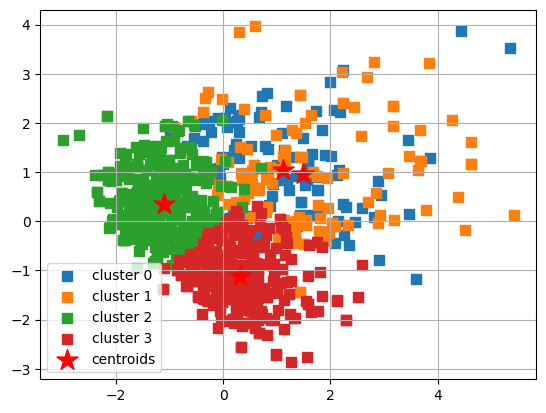

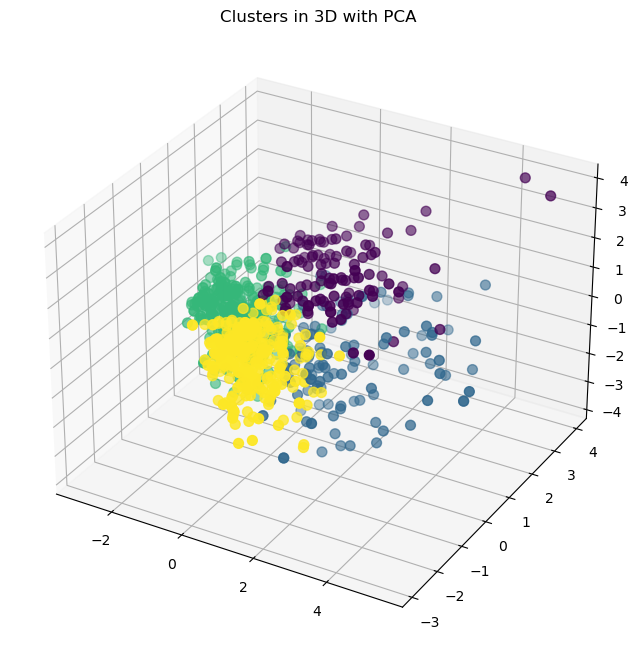

Inertia: 4933.22395761157


In [112]:
# K-Means Clustering
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
y_km = kmeans.fit_predict(pca_transformed)

# Function to plot clusters
def plot_clusters(X, y_res, plt_cluster_centers=False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster, 0]
        y = X[y_res == cluster, 1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x, y, s=50, marker='s', label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids, Y_centroids, marker='*', c='red', s=250, label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

# Call the function to plot clusters
plot_clusters(pca_transformed, y_km, plt_cluster_centers=True)

# 3D plot of clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_transformed[:, 0], pca_transformed[:, 1], pca_transformed[:, 2], c=y_km, s=50, cmap='viridis')
ax.set_title("Clusters in 3D with PCA")
plt.show()

# Print inertia
print("Inertia:", kmeans.inertia_)

Output the average Silhouette Score

In [113]:
# Silhouette Score
kmeans_silhouette = silhouette_score(pca_transformed, y_km)
print(f'K-Means Silhouette Score: {kmeans_silhouette}')

K-Means Silhouette Score: 0.14840351001903437


Hierarchical clustering 

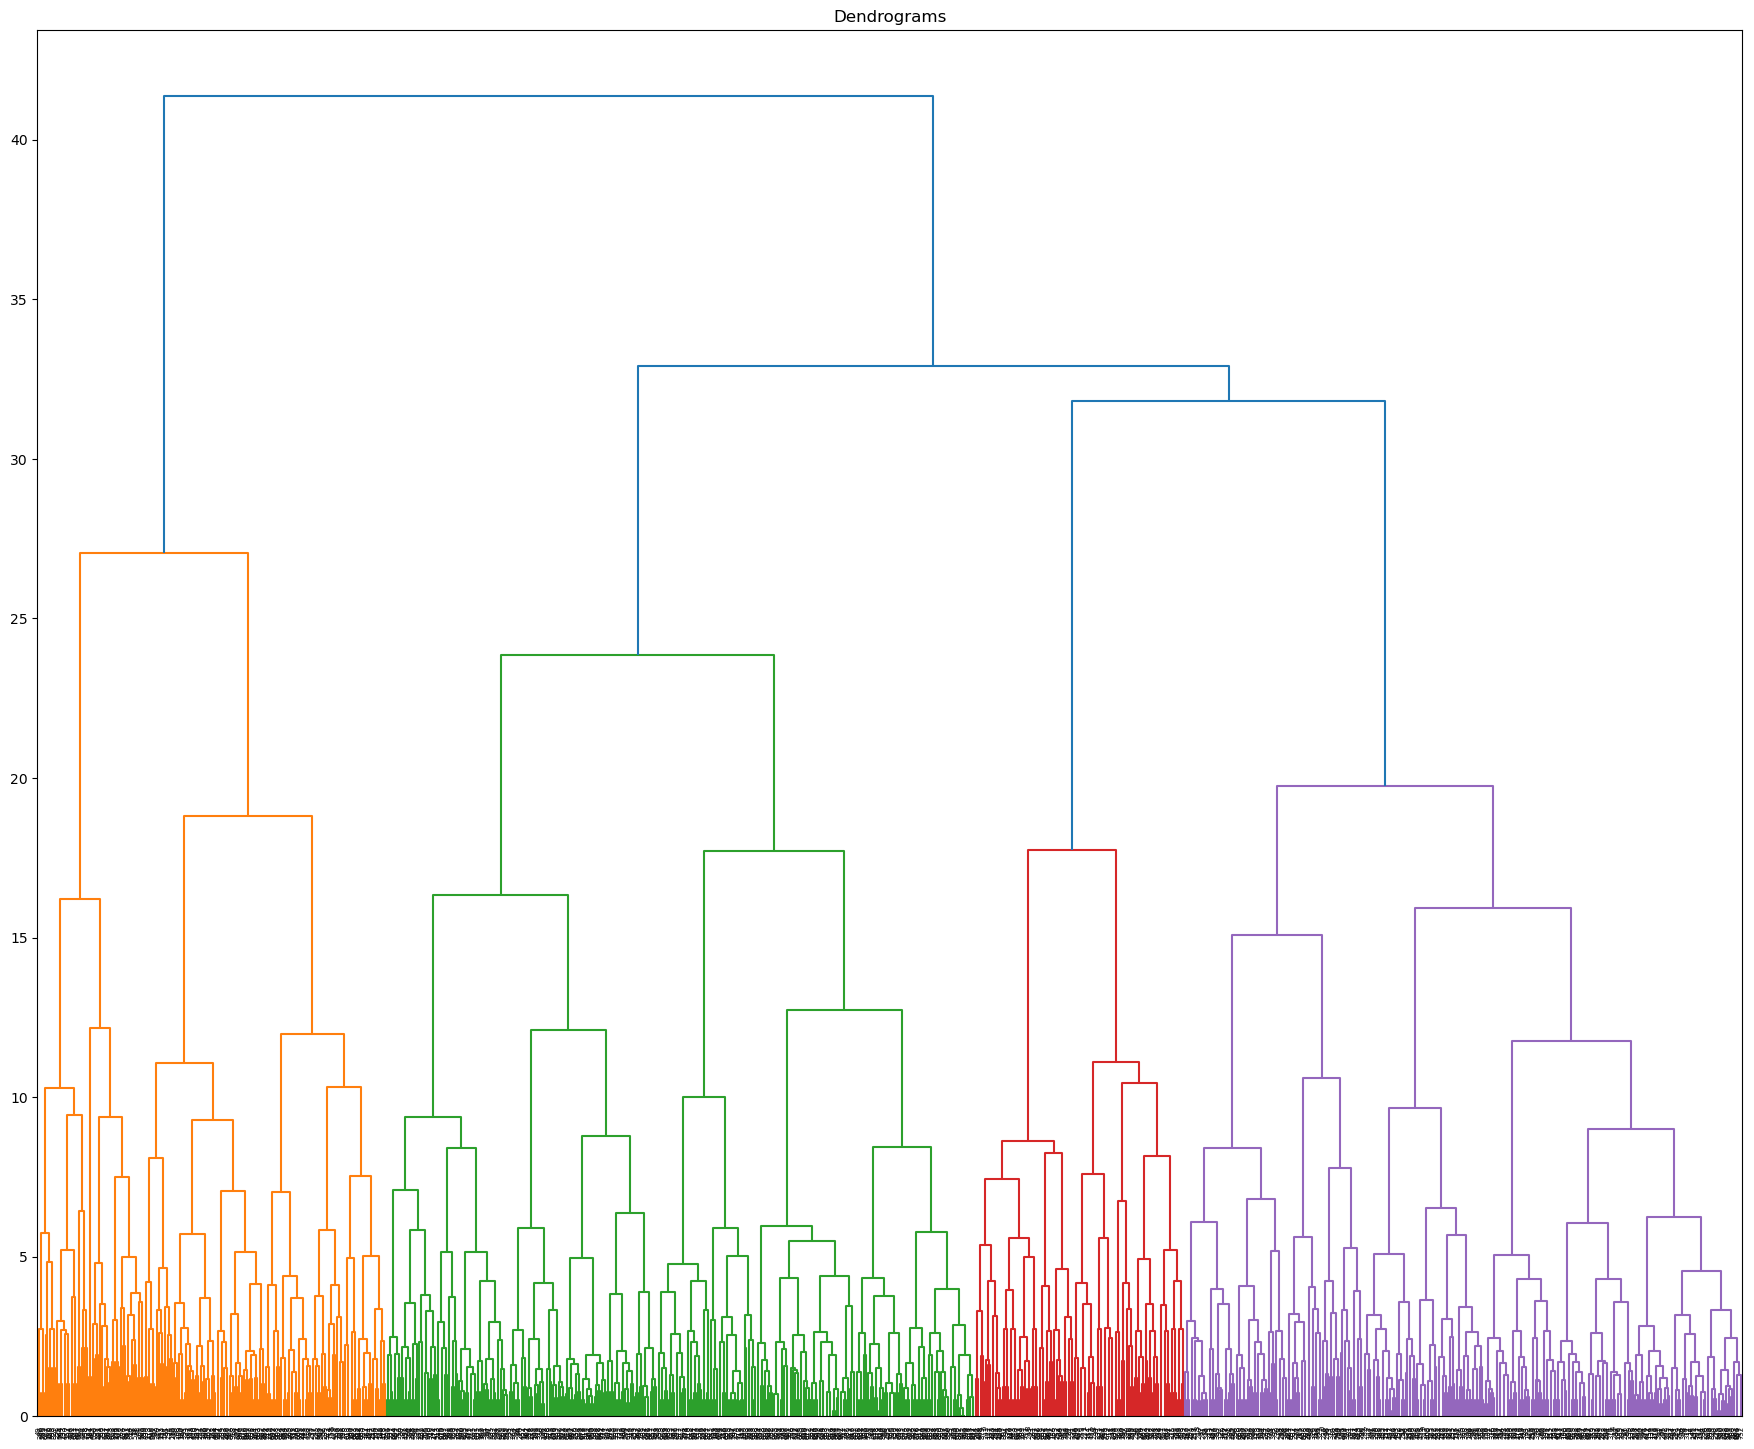

In [114]:
#Draw the dendrogram
plt.figure(figsize=(22, 18))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(pca_transformed, method='ward'))

The x-axis contains the samples and the y-axis represents the distance between these samples. The vertical line with maximum distance is the blue line and thus we can decide on a threshold of 80 and cut the dendrogram:

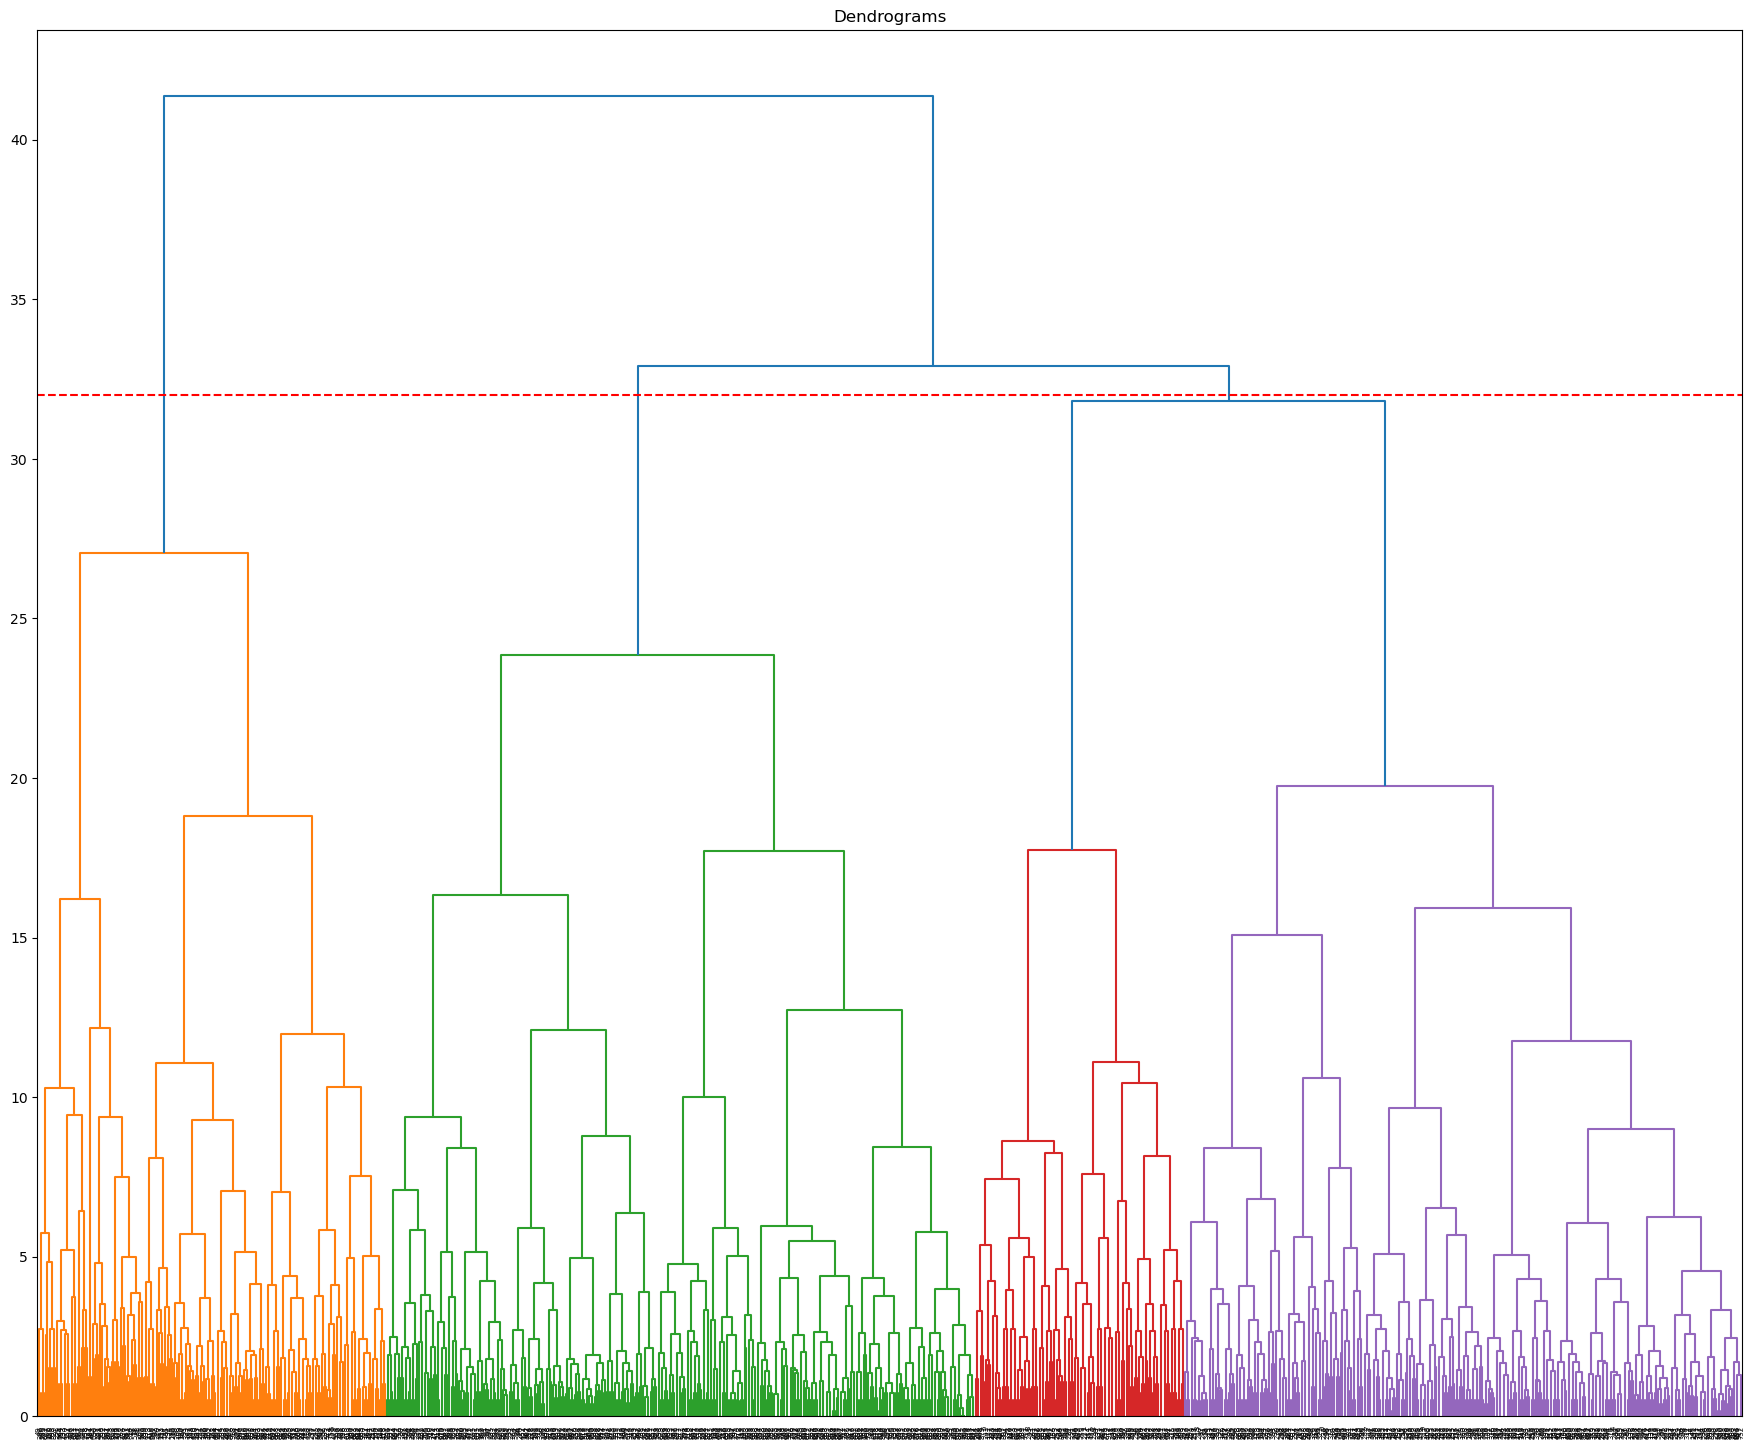

In [115]:
# Redraw the dendrogram with the cut-off line
plt.figure(figsize=(22, 18))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(pca_transformed, method='ward'))
plt.axhline(y=32, color='r', linestyle='--')
plt.show()

We have 3 clusters as this line cuts the dendrogram at two points. Now apply hierarchical clustering for 3 clusters

In [116]:
# Use AgglomerativeClustering with the distance threshold
distance_threshold = 32
hc = AgglomerativeClustering(n_clusters=None, affinity='euclidean', linkage='ward', distance_threshold=distance_threshold)
cluster_labels = hc.fit_predict(pca_transformed)

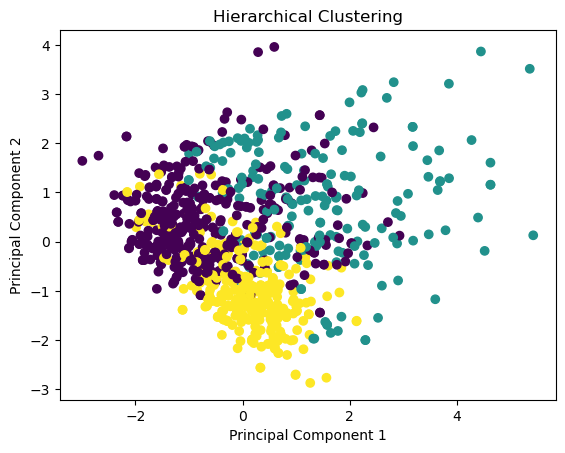

In [117]:
# Plot the clusters 
plt.scatter(pca_transformed[:, 0], pca_transformed[:, 1], c=cluster_labels, cmap='viridis', marker='o')
plt.title('Hierarchical Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Output the average Silhouette Score

In [118]:
# Silhouette Score
hierarchical_silhouette = silhouette_score(pca_transformed, cluster_labels)
print(f'Hierarchical Silhouette Score: {hierarchical_silhouette}')

Hierarchical Silhouette Score: 0.09485353418630739


In [119]:
# Comparing Silhouette Scores
if kmeans_silhouette > hierarchical_silhouette:
    print("K-Means performs better based on Silhouette Score.")
elif kmeans_silhouette < hierarchical_silhouette:
    print("Hierarchical Clustering performs better based on Silhouette Score.")
else:
    print("Both clustering methods perform equally based on Silhouette Score.")

K-Means performs better based on Silhouette Score.


MinMaxscaler

In [120]:
# Make a copy of dataset
df_MinMax = df_reduced.copy()

In [121]:
# List of numerical columns to scale
numerical_cols = [
    'Tenure', 'HourSpendOnApp', 'NumberOfDeviceRegistered',
    'SatisfactionScore', 'NumberOfAddress',
    'CouponUsed', 'DaySinceLastOrder']

# Initialize the StandardScaler
scaler = MinMaxScaler()

# Apply scaling to the numerical columns
df_MinMax[numerical_cols] = scaler.fit_transform(df_standard[numerical_cols])
df_MinMax.shape

(944, 15)

Plot the explained variance ratio

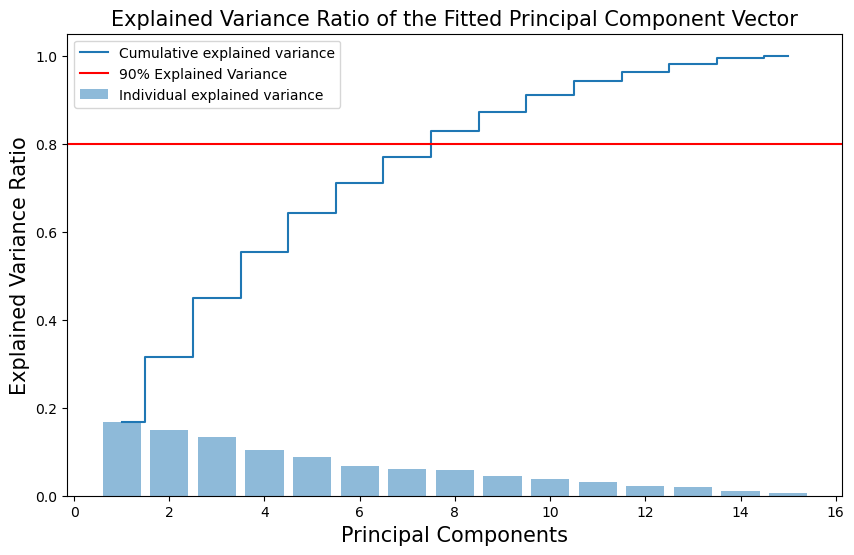

In [122]:
# Fit PCA with all components
pca = PCA(n_components=None)
pca_transformed_MinMax = pca.fit_transform(df_MinMax)

# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the explained variance ratio
plt.figure(figsize=(10,6))
plt.bar(range(1, len(cumulative_variance) + 1), pca.explained_variance_ratio_, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative explained variance')
plt.axhline(y=0.80, color='r', linestyle='-', label='90% Explained Variance')

plt.title("Explained Variance Ratio of the Fitted Principal Component Vector", fontsize=15)
plt.xlabel("Principal Components", fontsize=15)
plt.ylabel("Explained Variance Ratio", fontsize=15)
plt.legend(loc='best')
plt.show()

Kmeans clustering

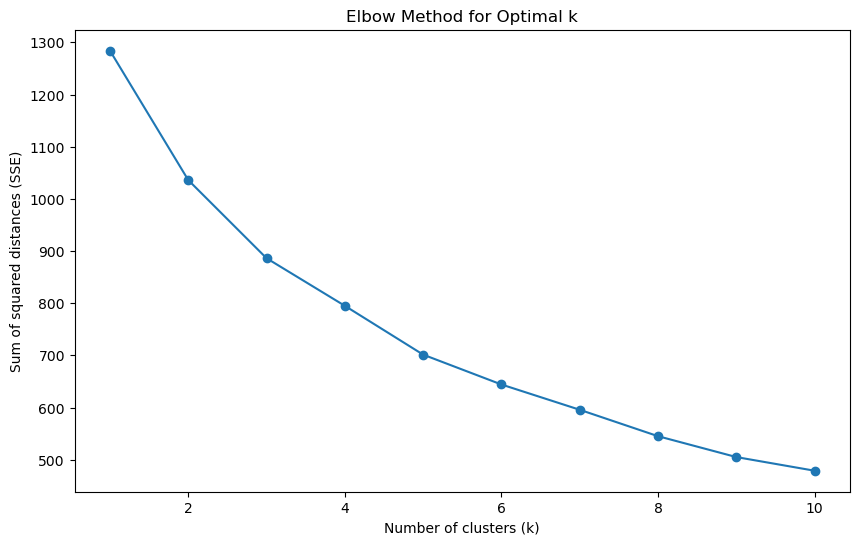

In [123]:
# Fit PCA on the dataset and transform it
pca = PCA(n_components=7) 
pca_transformed_MinMax = pca.fit_transform(df_MinMax)

# Compute the sum of squared distances (SSE) for different numbers of clusters (k)
sse = []
list_k = range(1, 11) 

for k in list_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_transformed_MinMax)  # Use the PCA-reduced data here
    sse.append(kmeans.inertia_)

# Plot the SSE for each k to find the elbow
plt.figure(figsize=(10, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances (SSE)')
plt.title('Elbow Method for Optimal k')
plt.show()

In [124]:
range_n_clusters = list(range(2, 11))  # Silhouette analysis requires at least 2 clusters

best_silhouette = -1
best_k = 0
silhouette_scores = []

for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator seed for reproducibility
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(pca_transformed_MinMax)
    
    # Calculate the silhouette score (the mean silhouette coefficient over all samples)
    silhouette_avg = silhouette_score(pca_transformed_MinMax, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")
    
    # Compare with the best silhouette score found so far
    if silhouette_avg > best_silhouette:
        best_silhouette = silhouette_avg
        best_k = n_clusters

# After finding the best_k, refit KMeans with the best number of clusters
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(pca_transformed_MinMax)
cluster_labels = kmeans.labels_

For n_clusters = 2, the average silhouette_score is : 0.20984842316137
For n_clusters = 3, the average silhouette_score is : 0.21220602818532178
For n_clusters = 4, the average silhouette_score is : 0.22588089796575325
For n_clusters = 5, the average silhouette_score is : 0.25086667979006455
For n_clusters = 6, the average silhouette_score is : 0.25890520532196987
For n_clusters = 7, the average silhouette_score is : 0.26830388343686384
For n_clusters = 8, the average silhouette_score is : 0.2746001941483664
For n_clusters = 9, the average silhouette_score is : 0.2914442877782744
For n_clusters = 10, the average silhouette_score is : 0.29971048617870594


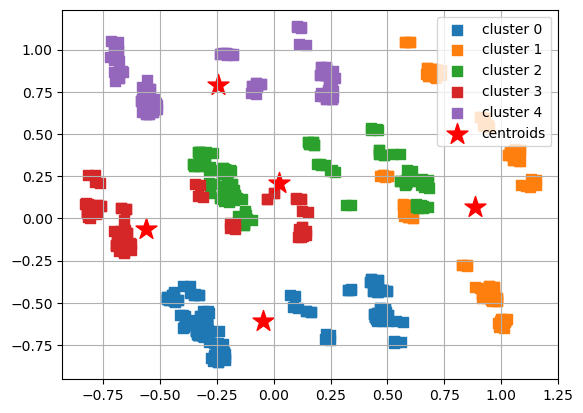

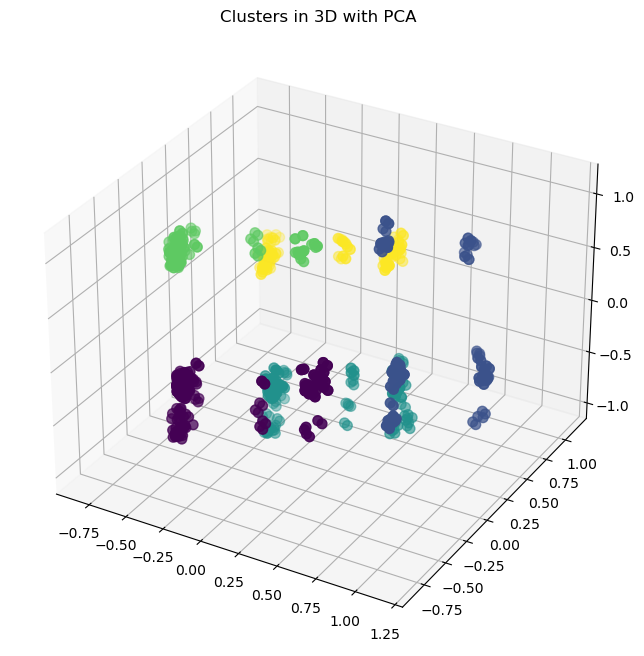

Inertia: 701.4250621801909


In [125]:
# K-Means Clustering
optimal_clusters_MinMax = 5
kmeans_MinMax = KMeans(n_clusters=optimal_clusters_MinMax, random_state=42)
y_km_MinMax = kmeans_MinMax.fit_predict(pca_transformed_MinMax)

# Function to plot clusters
def plot_clusters(X, y_res, plt_cluster_centers=True):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster, 0]
        y = X[y_res == cluster, 1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x, y, s=50, marker='s', label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(kmeans_MinMax.cluster_centers_[:, 0], kmeans_MinMax.cluster_centers_[:, 1], marker='*', c='red', s=250, label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

# Call the function to plot clusters
plot_clusters(pca_transformed_MinMax, y_km_MinMax)

# 3D plot of clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_transformed_MinMax[:, 0], pca_transformed_MinMax[:, 1], pca_transformed_MinMax[:, 2], c=y_km_MinMax, s=50, cmap='viridis')
ax.set_title("Clusters in 3D with PCA")
plt.show()

# Print inertia
print("Inertia:", kmeans_MinMax.inertia_)

Output the average Silhouette Score

In [126]:
# Silhouette Score
kmeans_silhouette_MinMax = silhouette_score(pca_transformed_MinMax, y_km_MinMax)
print(f'K-Means Silhouette Score: {kmeans_silhouette_MinMax}')

K-Means Silhouette Score: 0.25086667979006455


Hierarchical clustering 

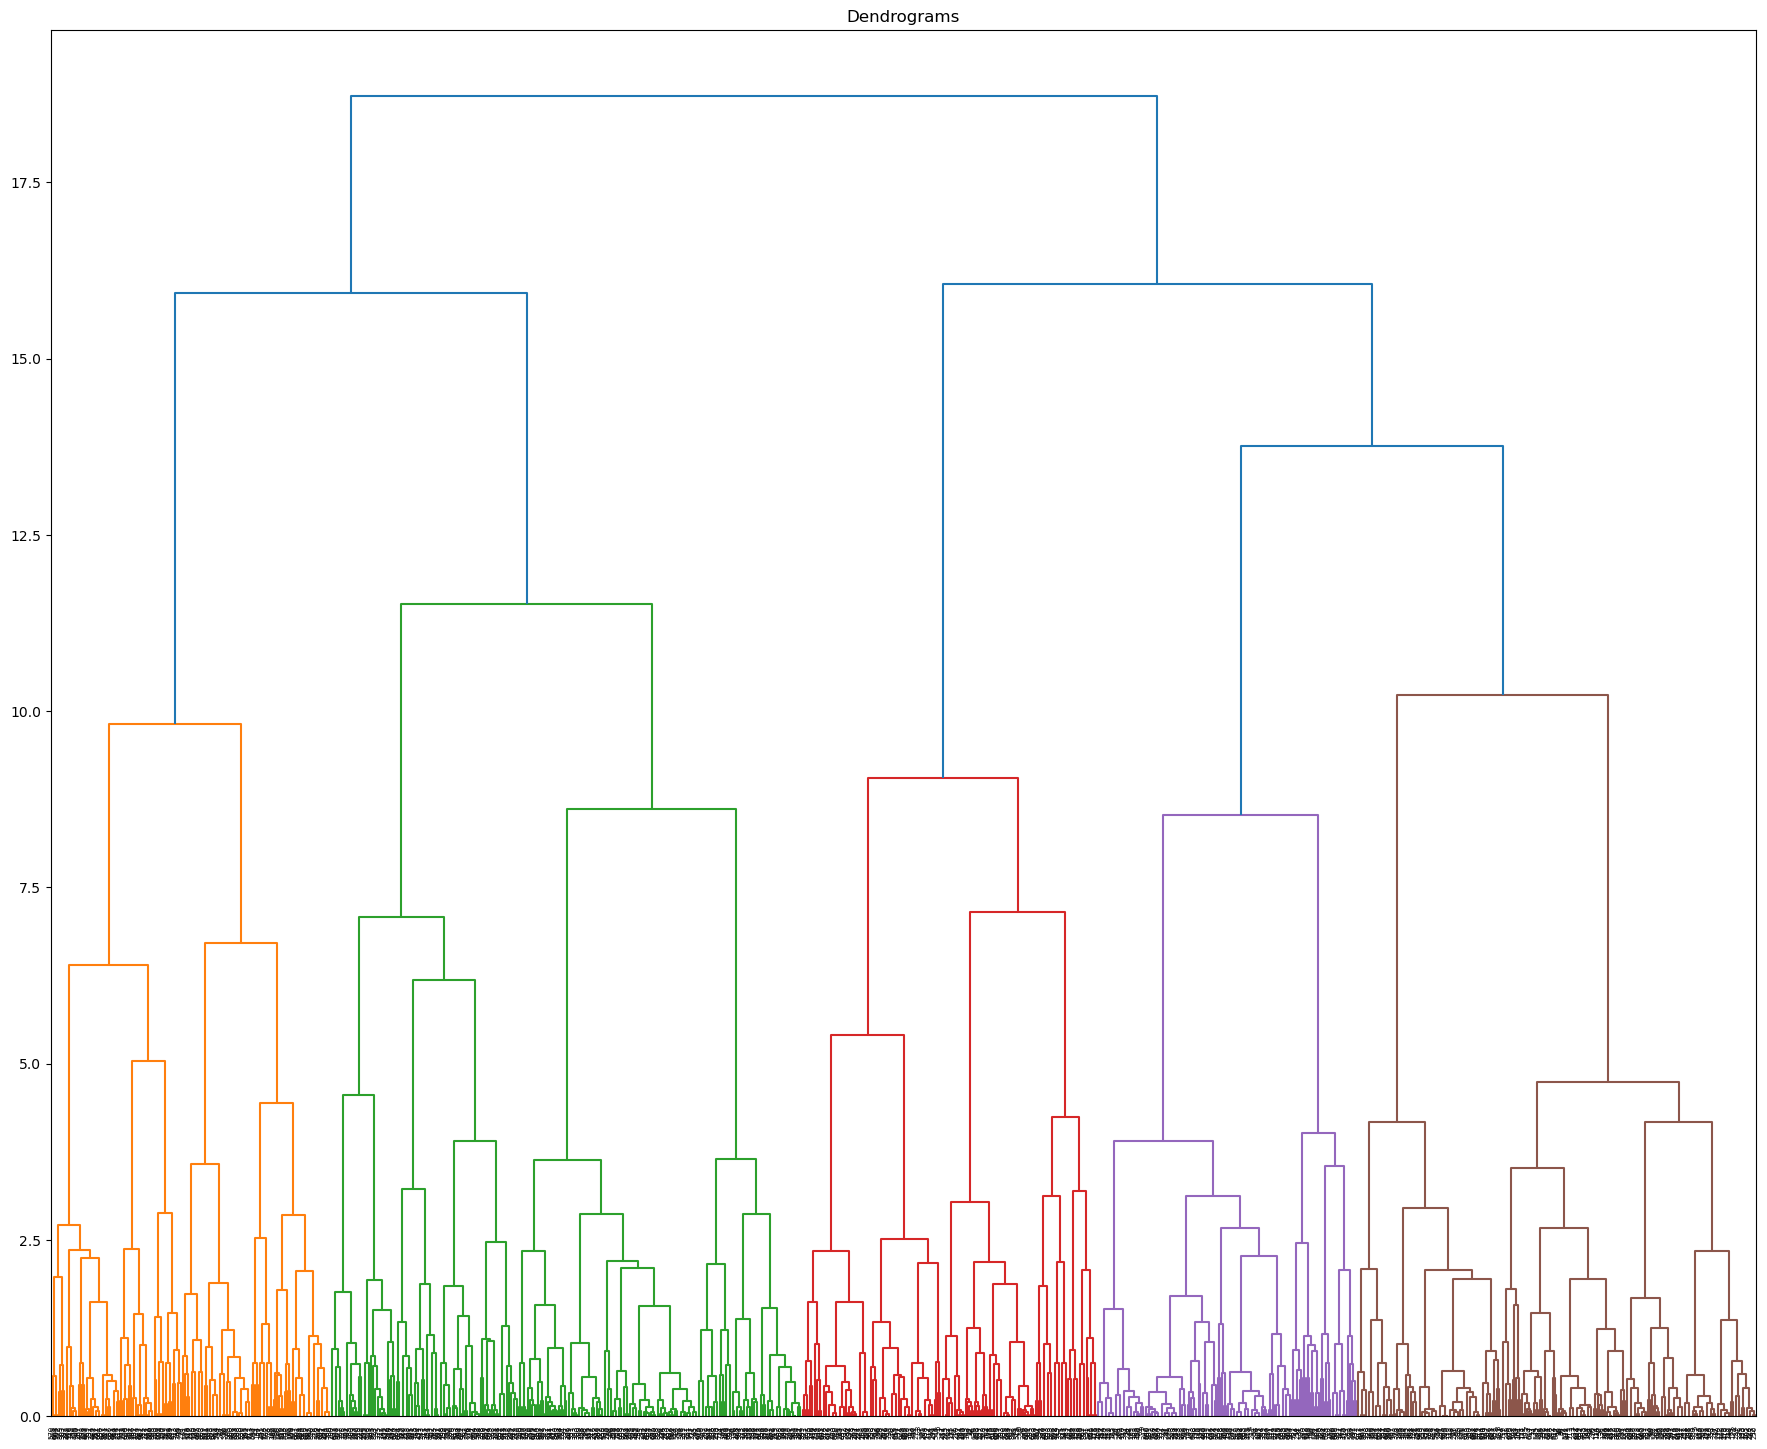

In [127]:
#Draw the dendrogram
plt.figure(figsize=(22, 18))  
plt.title("Dendrograms")  
dend_MinMax = shc.dendrogram(shc.linkage(pca_transformed_MinMax, method='ward'))

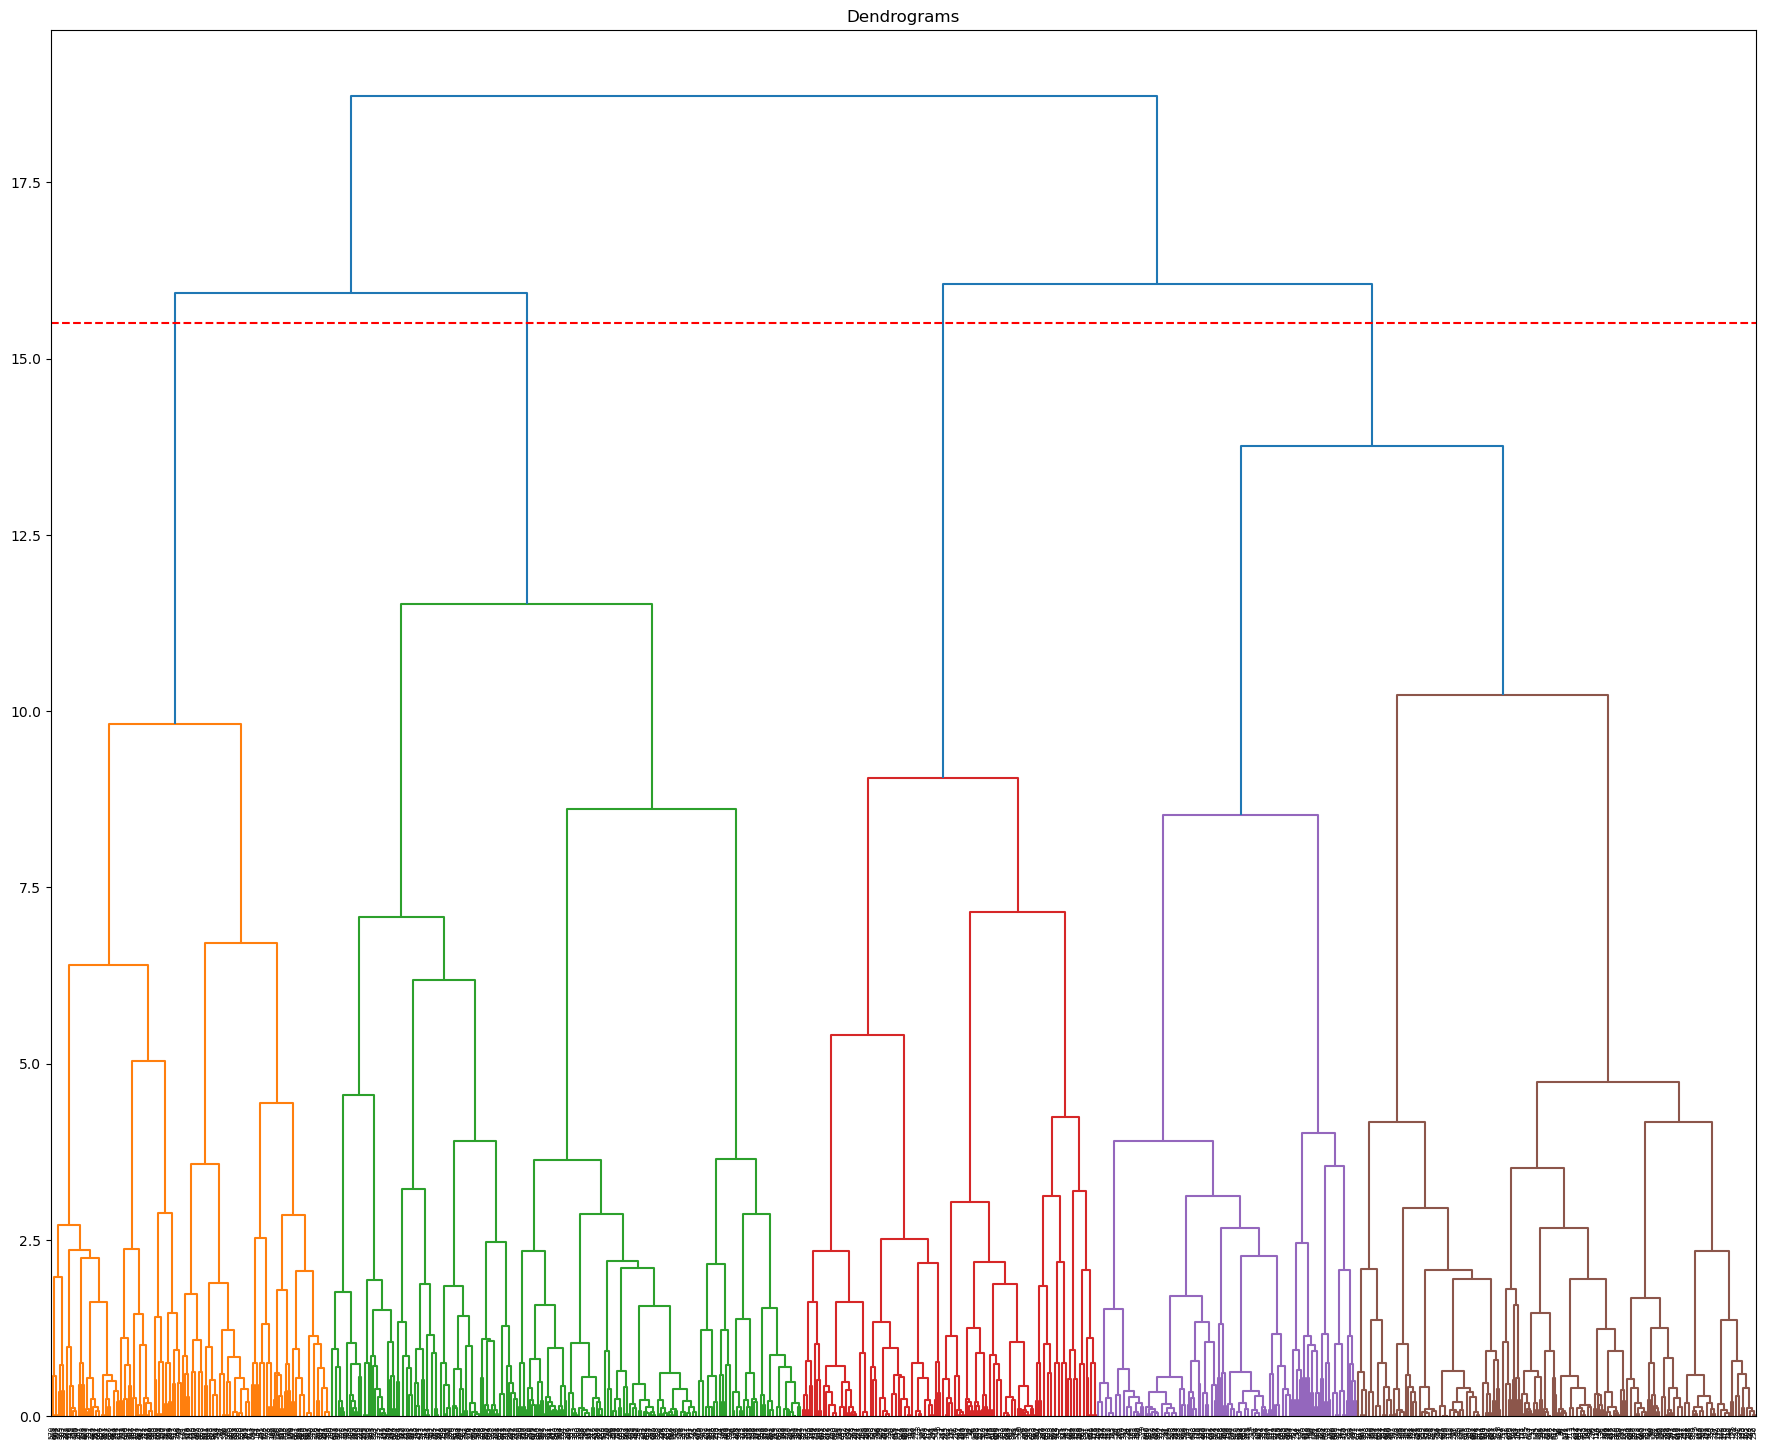

In [128]:
# Redraw the dendrogram with the cut-off line
plt.figure(figsize=(22, 18))  
plt.title("Dendrograms")  
dend_MinMax = shc.dendrogram(shc.linkage(pca_transformed_MinMax, method='ward'))
plt.axhline(y=15.5, color='r', linestyle='--')
plt.show()

In [129]:
# Use AgglomerativeClustering with the distance threshold
distance_threshold = 15.5
hc = AgglomerativeClustering(n_clusters=None, affinity='euclidean', linkage='ward', distance_threshold=distance_threshold)
cluster_labels = hc.fit_predict(pca_transformed_MinMax)

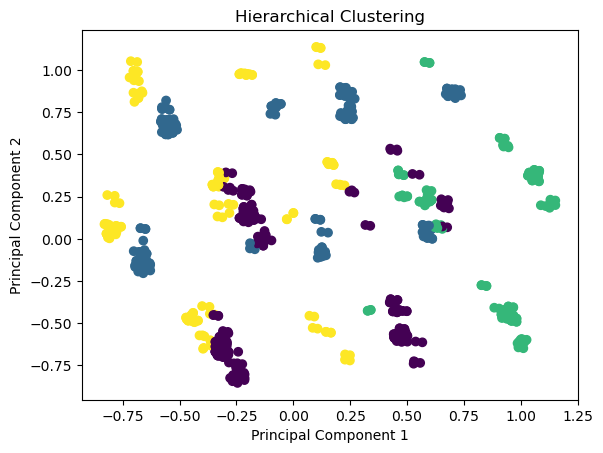

In [130]:
# Plot the clusters
plt.scatter(pca_transformed_MinMax[:, 0], pca_transformed_MinMax[:, 1], c=cluster_labels, cmap='viridis', marker='o')
plt.title('Hierarchical Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [131]:
# Silhouette Score
hierarchical_silhouette_MinMax = silhouette_score(pca_transformed_MinMax, cluster_labels)
print(f'Hierarchical Silhouette Score: {hierarchical_silhouette_MinMax}')

Hierarchical Silhouette Score: 0.19272510617909497


In [132]:
# Comparing Silhouette Scores
if kmeans_silhouette_MinMax > hierarchical_silhouette_MinMax:
    print("K-Means performs better based on Silhouette Score.")
elif kmeans_silhouette_MinMax < hierarchical_silhouette_MinMax:
    print("Hierarchical Clustering performs better based on Silhouette Score.")
else:
    print("Both clustering methods perform equally based on Silhouette Score.")

K-Means performs better based on Silhouette Score.


In [133]:
# Print Silhouette Score each method

print(f'Silhouette Score of Kmean at Standardscaler: {kmeans_silhouette}')
print(f'Silhouette Score of hierarchical at Standardscaler: {hierarchical_silhouette}')
print(f'Silhouette Score of Kmean at MinMaxscaler: {kmeans_silhouette_MinMax}')
print(f'Silhouette Score of hierarchical at MinMaxscaler: {hierarchical_silhouette_MinMax}')

Silhouette Score of Kmean at Standardscaler: 0.14840351001903437
Silhouette Score of hierarchical at Standardscaler: 0.09485353418630739
Silhouette Score of Kmean at MinMaxscaler: 0.25086667979006455
Silhouette Score of hierarchical at MinMaxscaler: 0.19272510617909497


The silhouette score is a measure of cluster cohesion and separation; a higher silhouette score indicates that the clustering has, on average, better-defined clusters. Therefore, the K-means clustering with MinMaxScaler has the highest silhouette score among the methods we've tested, it suggests that this method yields the most distinct clusters for the dataset.



In [134]:
y_km_MinMax.size

944

In [135]:
# Creat new dataframe df_cluster_churn_1 with customer churn (pred_Churn = 1)
df_cluster_churn_1 = df[df['pred_Churn'] == 1]

# Drop columns 'CustomerID', 'Churn', 'pred_Churn'
df_cluster_churn_1.drop(columns=['Churn'], inplace=True)

# Add Cluster Assignments to the DataFrame
df_cluster_churn_1['cluster'] =y_km_MinMax

In [136]:
df_cluster_churn_1

,CustomerID,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,pred_Churn,cluster
0,50001,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160,1,1
1,50002,9.0,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121,1,0
2,50003,9.0,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120,1,0
3,50004,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134,1,1
4,50005,0.0,Phone,1,12.0,CC,Male,3.0,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5585,55599,1.0,Computer,3,16.0,E wallet,Male,3.0,4,Mobile Phone,5,Married,3,0,20.0,2.0,2.0,1.0,143,1,4
5589,55603,1.0,Mobile Phone,1,8.0,Credit Card,Male,3.0,4,Mobile Phone,1,Married,11,1,15.0,3.0,3.0,3.0,173,1,3
5591,55605,20.0,Phone,1,14.0,COD,Male,4.0,4,Mobile Phone,3,Married,10,0,12.0,7.0,10.0,9.0,148,1,4
5599,55613,14.0,Computer,3,8.0,Debit Card,Male,4.0,4,Laptop & Accessory,3,Married,9,0,13.0,2.0,2.0,2.0,192,1,1


In [137]:
# Cluster 0
df_cluster_churn_1[df_cluster_churn_1['cluster'] == 0]

,CustomerID,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,pred_Churn,cluster
1,50002,9.0,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121,1,0
2,50003,9.0,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120,1,0
5,50006,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,Mobile Phone,5,Single,2,1,22.0,4.0,6.0,7.0,139,1,0
7,50008,9.0,Phone,1,6.0,CC,Male,3.0,3,Mobile,2,Divorced,3,1,16.0,2.0,2.0,0.0,123,1,0
8,50009,13.0,Phone,3,9.0,E wallet,Male,3.0,4,Mobile,3,Divorced,2,1,14.0,0.0,1.0,2.0,127,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5403,55416,1.0,Mobile Phone,3,23.0,Debit Card,Female,4.0,4,Fashion,5,Single,4,1,21.0,2.0,2.0,3.0,211,1,0
5480,55493,1.0,Computer,1,31.0,Debit Card,Male,4.0,5,Mobile Phone,1,Single,3,1,25.0,2.0,2.0,1.0,149,1,0
5487,55500,1.0,Mobile Phone,1,14.0,Debit Card,Male,4.0,4,Mobile Phone,4,Single,3,1,24.0,2.0,2.0,1.0,150,1,0
5522,55536,1.0,Computer,1,12.0,Debit Card,Female,3.0,2,Mobile Phone,3,Single,5,1,15.0,1.0,2.0,4.0,149,1,0


In [138]:
# Cluster 1
df_cluster_churn_1[df_cluster_churn_1['cluster'] == 1]

,CustomerID,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,pred_Churn,cluster
0,50001,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160,1,1
3,50004,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134,1,1
6,50007,9.0,Phone,3,11.0,Cash on Delivery,Male,2.0,3,Laptop & Accessory,2,Divorced,4,0,14.0,0.0,1.0,0.0,121,1,1
20,50021,0.0,Mobile Phone,3,12.0,Debit Card,Male,3.0,5,Laptop & Accessory,3,Divorced,5,1,18.0,6.0,7.0,7.0,162,1,1
23,50024,0.0,Phone,3,26.0,Debit Card,Female,3.0,5,Laptop & Accessory,3,Divorced,4,1,11.0,1.0,2.0,2.0,146,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,55442,1.0,Mobile Phone,3,34.0,Debit Card,Male,3.0,4,Laptop & Accessory,1,Single,3,1,19.0,4.0,8.0,8.0,183,1,1
5474,55487,1.0,Mobile Phone,3,9.0,E wallet,Male,3.0,5,Laptop & Accessory,4,Single,9,1,13.0,2.0,3.0,3.0,224,1,1
5517,55530,1.0,Mobile Phone,3,20.0,E wallet,Female,3.0,4,Laptop & Accessory,3,Single,5,1,12.0,1.0,3.0,3.0,224,1,1
5542,55556,1.0,Computer,3,33.0,E wallet,Male,4.0,4,Laptop & Accessory,1,Married,3,1,12.0,1.0,2.0,9.0,181,1,1


In [139]:
# Cluster 2
df_cluster_churn_1[df_cluster_churn_1['cluster'] == 2]

,CustomerID,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,pred_Churn,cluster
4,50005,0.0,Phone,1,12.0,CC,Male,3.0,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130,1,2
9,50010,9.0,Phone,1,31.0,Debit Card,Male,2.0,5,Mobile,3,Single,2,0,12.0,1.0,1.0,1.0,123,1,2
10,50011,4.0,Mobile Phone,1,18.0,Cash on Delivery,Female,2.0,3,Others,3,Divorced,2,0,15.0,9.0,15.0,8.0,295,1,2
14,50015,9.0,Mobile Phone,3,15.0,Credit Card,Male,3.0,4,Fashion,2,Single,2,0,16.0,0.0,4.0,7.0,196,1,2
21,50022,20.0,Mobile Phone,1,29.0,Credit Card,Female,3.0,3,Fashion,2,Divorced,2,0,12.0,11.0,15.0,6.0,203,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5419,55432,1.0,Mobile Phone,3,14.0,E wallet,Male,3.0,4,Mobile Phone,4,Single,3,0,14.0,1.0,2.0,1.0,152,1,2
5439,55452,1.0,Mobile Phone,1,17.0,Credit Card,Male,3.0,4,Laptop & Accessory,5,Single,3,0,16.0,1.0,2.0,9.0,167,1,2
5486,55499,1.0,Phone,3,16.0,Credit Card,Male,3.0,4,Mobile Phone,1,Single,3,0,14.0,1.0,2.0,1.0,136,1,2
5502,55515,20.0,Mobile Phone,1,31.0,Debit Card,Male,4.0,4,Mobile Phone,1,Single,3,0,17.0,1.0,2.0,1.0,151,1,2


In [140]:
# Cluster 3
df_cluster_churn_1[df_cluster_churn_1['cluster'] == 3]

,CustomerID,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,pred_Churn,cluster
15,50016,9.0,Phone,2,12.0,UPI,Male,3.0,3,Mobile,5,Married,5,1,22.0,1.0,1.0,2.0,121,1,3
161,50162,7.0,Computer,1,30.0,Debit Card,Male,3.0,3,Mobile,3,Married,4,1,22.0,0.0,1.0,0.0,132,1,3
163,50164,0.0,Phone,1,14.0,CC,Male,2.0,3,Mobile,4,Married,3,1,13.0,1.0,1.0,2.0,124,1,3
314,50316,0.0,Computer,2,29.0,UPI,Female,2.0,3,Fashion,5,Married,10,1,15.0,1.0,1.0,2.0,200,1,3
327,50329,0.0,Computer,2,23.0,Debit Card,Female,3.0,3,Mobile,3,Married,1,1,11.0,0.0,1.0,0.0,127,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5445,55458,1.0,Phone,2,27.0,Credit Card,Female,4.0,4,Mobile Phone,4,Married,2,1,12.0,1.0,2.0,5.0,146,1,3
5461,55474,1.0,Phone,2,20.0,UPI,Male,3.0,5,Mobile Phone,5,Married,6,1,16.0,3.0,3.0,1.0,148,1,3
5501,55514,1.0,Computer,1,23.0,COD,Male,3.0,6,Mobile Phone,5,Married,3,1,24.0,1.0,4.0,1.0,148,1,3
5589,55603,1.0,Mobile Phone,1,8.0,Credit Card,Male,3.0,4,Mobile Phone,1,Married,11,1,15.0,3.0,3.0,3.0,173,1,3


In [141]:
# Cluster 4
df_cluster_churn_1[df_cluster_churn_1['cluster'] == 4]

,CustomerID,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,pred_Churn,cluster
125,50126,0.0,Computer,1,16.0,Credit Card,Male,3.0,3,Fashion,3,Married,7,0,11.0,1.0,1.0,0.0,200,1,4
151,50152,2.0,Mobile Phone,1,28.0,Debit Card,Female,3.0,2,Fashion,4,Married,8,0,18.0,5.0,6.0,3.0,220,1,4
289,50291,0.0,Computer,3,14.0,E wallet,Female,2.0,5,Mobile,3,Married,1,0,16.0,1.0,1.0,0.0,124,1,4
310,50312,0.0,Phone,1,16.0,CC,Male,2.0,5,Mobile,2,Married,8,0,13.0,0.0,1.0,3.0,134,1,4
369,50371,0.0,Phone,3,8.0,E wallet,Male,3.0,3,Mobile,5,Married,1,0,11.0,0.0,1.0,2.0,130,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5481,55494,10.0,Mobile Phone,3,17.0,Debit Card,Female,4.0,4,Fashion,4,Married,7,0,22.0,2.0,2.0,8.0,198,1,4
5526,55540,1.0,Computer,2,29.0,UPI,Female,3.0,5,Mobile Phone,4,Married,3,0,13.0,2.0,2.0,1.0,154,1,4
5537,55551,1.0,Phone,1,24.0,COD,Male,3.0,5,Mobile Phone,1,Married,7,0,13.0,2.0,2.0,4.0,149,1,4
5585,55599,1.0,Computer,3,16.0,E wallet,Male,3.0,4,Mobile Phone,5,Married,3,0,20.0,2.0,2.0,1.0,143,1,4


In [142]:
df_cluster_churn_1

,CustomerID,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,pred_Churn,cluster
0,50001,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160,1,1
1,50002,9.0,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121,1,0
2,50003,9.0,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120,1,0
3,50004,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134,1,1
4,50005,0.0,Phone,1,12.0,CC,Male,3.0,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5585,55599,1.0,Computer,3,16.0,E wallet,Male,3.0,4,Mobile Phone,5,Married,3,0,20.0,2.0,2.0,1.0,143,1,4
5589,55603,1.0,Mobile Phone,1,8.0,Credit Card,Male,3.0,4,Mobile Phone,1,Married,11,1,15.0,3.0,3.0,3.0,173,1,3
5591,55605,20.0,Phone,1,14.0,COD,Male,4.0,4,Mobile Phone,3,Married,10,0,12.0,7.0,10.0,9.0,148,1,4
5599,55613,14.0,Computer,3,8.0,Debit Card,Male,4.0,4,Laptop & Accessory,3,Married,9,0,13.0,2.0,2.0,2.0,192,1,1


Model Saving

clustering model

In [143]:
#  Export the updated DataFrame to a CSV file
df_cluster_churn_1.to_csv(r'C:\Users\CFS\Desktop\Data analysis\Final Project\clustering.csv', index=False)

In [144]:
# Export the model to a pickle file
with open(r'C:\Users\CFS\Desktop\Data analysis\Final Project\clustering model.pkl', 'wb') as file:
    pickle.dump(kmeans_MinMax, file)

# Connlusion:
- Cluster 0: Mixed Tenure, Moderate Engagement
    - Tenure: A mix of new and established customers.
    - Engagement: Varied coupon usage and order counts may indicate varying degrees of engagement.
    - Issues: Presence of complaints suggests potential dissatisfaction.
    - Satisfaction: Varied scores suggest inconsistent experiences.
    - Retention Opportunity: Addressing complaints and improving customer service could enhance loyalty. Personalized engagement based on individual customer behavior could also be beneficial.
- Cluster 1: New Customers, High Number of Addresses
    - Tenure: Skews towards newer customers.
    - Mobility: High number of addresses may indicate a transient customer base.
    - Preferences: A clear preference for laptops and accessories, which may indicate higher value purchases.
    - Retention Opportunity: Stability in service and follow-up after address changes could improve retention. Targeted promotions on tech products could increase repeat purchases.
- Cluster 2: High Satisfaction and Cashback, Fashion and Mobile Preferred
    - Satisfaction: Generally high, with some very satisfied customers.
    - Financial Incentives: High cashback amounts and coupon usage.
    - Product Preference: Notable preference for mobile phones and fashion.
    - Retention Opportunity: Leverage high satisfaction to create brand ambassadors. Continue cashback and coupon strategies but focus on creating long-term value rather than one-time purchases.
- Cluster 3: Married Customers, High Satisfaction
    - Demographics: A noticeable number of married customers.
    - Satisfaction: High satisfaction scores across the board.
    - Complaints: Fewer complaints suggest better experiences or lower expectations.
    - Retention Opportunity: Family-oriented marketing and retention programs. Explore loyalty programs that reward consistent purchasing behavior.
- Cluster 4: Newer Customers, Varied Satisfaction
    - Tenure: Mostly new customers, indicating potential for growth.
    - Financial Incentives: High cashback suggesting an acquisition strategy.
    - Satisfaction: Some inconsistency in satisfaction scores.
    - Retention Opportunity: Develop onboarding programs to educate new customers. Analyze the drivers behind varied satisfaction to improve service and product offerings.
